In [3]:
import http.client

conn = http.client.HTTPSConnection("api.apihighways.org")

conn.request("GET", "/query?sql=SELECT%20*%20FROM%20aa1c5c53-cb73-4b29-94f4-5b1695d37dc5")

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"data":[{"1960":0,"1961":0,"1962":0,"1963":0,"1964":0,"1965":0,"1966":0,"1967":0,"1968":0,"1969":0,"1970":0,"1971":0,"1972":0,"1973":0,"1974":0,"1975":0,"1976":0,"1977":0,"1978":0,"1979":0,"1980":0,"1981":0,"1982":0,"1983":0,"1984":0,"1985":0,"1986":0,"1987":0,"1988":0,"1989":0,"1990":0,"1991":0,"1992":0,"1993":0,"1994":0,"1995":0,"1996":0,"1997":0,"1998":0,"1999":0,"2000":0,"2001":0,"2002":0,"2003":0,"2004":0,"2005":0,"2006":0,"2007":0,"2008":0,"2009":0,"2010":0,"2011":0,"2012":0,"2013":0,"2014":0,"2015":0,"2016":0,"Country_Name":"Andorra","Country_Code":"AND","Indicator_Name":"Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)","Indicator_Code":"SI.POV.DDAY","_id":"AVmXp2sRGMS00IEWB7HJ"},{"1960":0,"1961":0,"1962":0,"1963":0,"1964":0,"1965":0,"1966":0,"1967":0,"1968":0,"1969":0,"1970":0,"1971":0,"1972":0,"1973":0,"1974":0,"1975":0,"1976":0,"1977":0,"1978":0,"1979":0,"1980":0,"1981":0,"1982":0,"1983":0,"1984":0,"1985":0,"1986":0,"1987":0,"1988":0,"1989":0,"1990":0,"19

In [4]:
import json
j = json.loads(data)
j.keys()

dict_keys(['data', 'meta'])

In [5]:
import pandas as pd
#df = pd.read_json(data["data"], orient='records')     # "TypeError: byte indices must be integers or slices, not str"

df = pd.DataFrame(j["data"])
df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,Country_Code,Country_Name,Indicator_Code,Indicator_Name,_id
0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0,0,AND,Andorra,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,AVmXp2sRGMS00IEWB7HJ
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0,0,AFG,Afghanistan,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,AVmXp2sRGMS00IEWB7HK
2,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0,0,AGO,Angola,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,AVmXp2sRGMS00IEWB7HL
3,0,0,0,0,0,0,0,0,0,0,...,1.06,0.0,0.0,0,0,ALB,Albania,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,AVmXp2sRGMS00IEWB7HM
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0,0,ARE,United Arab Emirates,SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 P...,AVmXp2sRGMS00IEWB7HO


In [6]:
# "enables the %%R magic, not necessary if you've already done this"
%load_ext rpy2.ipython

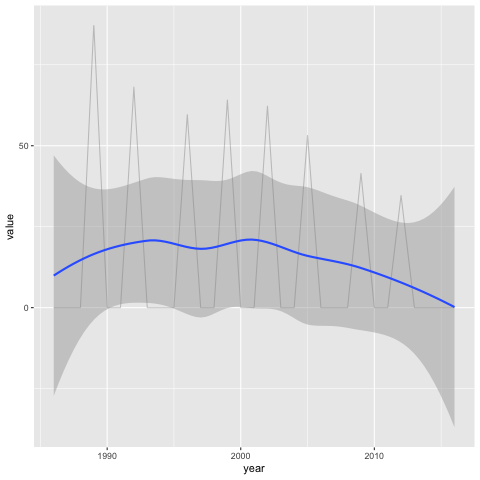

In [89]:
%%R -i df
library(tidyverse)
library(lubridate)
df <- as_tibble(df)

# df <- gather(df, X1960, X1961, X1962, X1963, X1964, X1965, X1966, X1967, X1968, X1969,
#       X1970, X1971, X1972, X1973, X1974, X1975, X1976, X1977, X1978, X1979,
#       X1980, X1981, X1982, X1983, X1984, X1985, X1986, X1987, X1988, X1989,
#       X1990, X1991, X1992, X1993, X1994, X1995, X1996, X1997, X1998, X1999,
#       X2000, X2001, X2002, X2003, X2004, X2005, X2006, X2007, X2008, X2009,
#       X2010, X2011, X2012, X2013, X2014, X2015, X2016, key = "year", value = "value")

df <- rename(df, `1960` = X1960, `1961` = X1961, `1962` = X1962, `1963` = X1963, `1964` = X1964,
             `1965` = X1965, `1966` = X1966, `1967` = X1967, `1968` = X1968, `1969` = X1969,
             `1970` = X1970, `1971` = X1971, `1972` = X1972, `1973` = X1973, `1974` = X1974,
             `1975` = X1975, `1976` = X1976, `1977` = X1977, `1978` = X1978, `1979` = X1979,
             `1980` = X1980, `1981` = X1981, `1982` = X1982, `1983` = X1983, `1984` = X1984,
             `1985` = X1985, `1986` = X1986, `1987` = X1987, `1988` = X1988, `1989` = X1989,
             `1990` = X1990, `1991` = X1991, `1992` = X1992, `1993` = X1993, `1994` = X1994,
             `1995` = X1995, `1996` = X1996, `1997` = X1997, `1998` = X1998, `1999` = X1999,
             `2000` = X2000, `2001` = X2001, `2002` = X2002, `2003` = X2003, `2004` = X2004,
             `2005` = X2005, `2006` = X2006, `2007` = X2007, `2008` = X2008, `2009` = X2009,
             `2010` = X2010, `2011` = X2011, `2012` = X2012, `2013` = X2013, `2014` = X2014,
             `2015` = X2015, `2016` = X2016, `_id` = X_id
             )

df <- gather(df, `1960`, `1961`, `1962`, `1963`, `1964`, `1965`, `1966`, `1967`, `1968`, `1969`,
       `1970`, `1971`, `1972`, `1973`, `1974`, `1975`, `1976`, `1977`, `1978`, `1979`,
       `1980`, `1981`, `1982`, `1983`, `1984`, `1985`, `1986`, `1987`, `1988`, `1989`,
       `1990`, `1991`, `1992`, `1993`, `1994`, `1995`, `1996`, `1997`, `1998`, `1999`,
       `2000`, `2001`, `2002`, `2003`, `2004`, `2005`, `2006`, `2007`, `2008`, `2009`,
       `2010`, `2011`, `2012`, `2013`, `2014`, `2015`, `2016`, key = "year", value = "value")

df$year <- parse_date_time(df$year, "y") %>% year

df %>% filter(year > 1985, Country_Name == "Uganda") %>%
ggplot(aes(x=year, y=value)) +
  geom_line(aes(group = Country_Name), alpha = 0.2) +
  geom_smooth()

In [45]:
%%R -i df
df <- rename(df, `1960` = X1960, `1961` = X1961, `1962` = X1962, `1963` = X1963, `1964` = X1964,
             `1965` = X1965, `1966` = X1966, `1967` = X1967, `1968` = X1968, `1969` = X1969,
             `1970` = X1970, `1971` = X1971, `1972` = X1972, `1973` = X1973, `1974` = X1974,
             `1975` = X1975, `1976` = X1976, `1977` = X1977, `1978` = X1978, `1979` = X1979,
             `1980` = X1980, `1981` = X1981, `1982` = X1982, `1983` = X1983, `1984` = X1984,
             `1985` = X1985, `1986` = X1986, `1987` = X1987, `1988` = X1988, `1989` = X1989,
             `1990` = X1990, `1991` = X1991, `1992` = X1992, `1993` = X1993, `1994` = X1994,
             `1995` = X1995, `1996` = X1996, `1997` = X1997, `1998` = X1998, `1999` = X1999,
             `2000` = X2000, `2001` = X2001, `2002` = X2002, `2003` = X2003, `2004` = X2004,
             `2005` = X2005, `2006` = X2006, `2007` = X2007, `2008` = X2008, `2009` = X2009,
             `2010` = X2010, `2011` = X2011, `2012` = X2012, `2013` = X2013, `2014` = X2014,
             `2015` = X2015, `2016` = X2016, `_id` = X_id
             )
df

    X1960 X1961 X1962 X1963 X1964 X1965 X1966 X1967 X1968 X1969 X1970 X1971
0       0     0     0     0     0     0     0     0     0     0     0     0
1       0     0     0     0     0     0     0     0     0     0     0     0
2       0     0     0     0     0     0     0     0     0     0     0     0
3       0     0     0     0     0     0     0     0     0     0     0     0
4       0     0     0     0     0     0     0     0     0     0     0     0
5       0     0     0     0     0     0     0     0     0     0     0     0
6       0     0     0     0     0     0     0     0     0     0     0     0
7       0     0     0     0     0     0     0     0     0     0     0     0
8       0     0     0     0     0     0     0     0     0     0     0     0
9       0     0     0     0     0     0     0     0     0     0     0     0
10      0     0     0     0     0     0     0     0     0     0     0     0
11      0     0     0     0     0     0     0     0     0     0     0     0
12      0   

In [39]:
%R
gather(df, `1960`, `1961`, `1962`, `1963`, `1964`, `1965`, `1966`, `1967`, `1968`, `1969`,
       `1970`, `1971`, `1972`, `1973`, `1974`, `1975`, `1976`, `1977`, `1978`, `1979`,
       `1980`, `1981`, `1982`, `1983`, `1984`, `1985`, `1986`, `1987`, `1988`, `1989`,
       `1990`, `1991`, `1992`, `1993`, `1994`, `1995`, `1996`, `1997`, `1998`, `1999`,
       `2000`, `2001`, `2002`, `2003`, `2004`, `2005`, `2006`, `2007`, `2008`, `2009`,
       `2010`, `2011`, `2012`, `2013`, `2014`, `2015`, `2016`, key = "year", value = "value")

SyntaxError: invalid syntax (<ipython-input-39-c06f40d67970>, line 2)

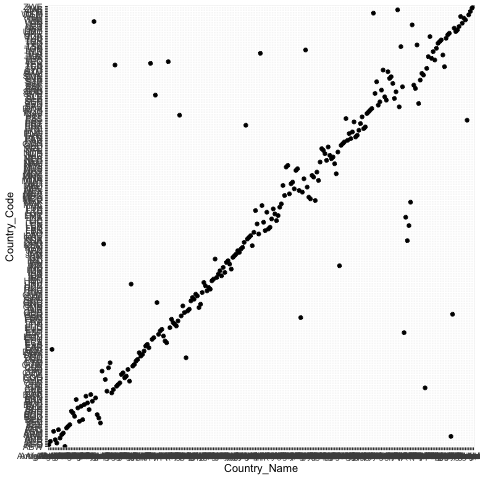

In [32]:
%%R -i df
ggplot(df, aes(x=Country_Name, y=Country_Code)) +
  geom_point()

# cf. [http://simecek.xyz/blog/2017/04/03/r-magic-in-jupyter-notebooks/]
# cf. [https://ipython.org/ipython-doc/2/config/extensions/rmagic.html]
# cf. [https://rpy2.readthedocs.io/en/version_2.8.x/introduction.html]
# cf. [https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook]